<center>
<a href="http://www.insa-toulouse.fr/" ><img src="http://www.math.univ-toulouse.fr/~besse/Wikistat/Images/logo-insa.jpg" style="float:left; max-width: 120px; display: inline" alt="INSA"/></a> 

<a href="http://wikistat.fr/" ><img src="http://www.math.univ-toulouse.fr/~besse/Wikistat/Images/wikistat.jpg" style="float:right; max-width: 250px; display: inline"  alt="Wikistat"/></a>
</center>

# [Scénarios d'Exploration Statistique](https://github.com/wikistat/Exploration)

# NMF et complétion de matrice avec <a href="https://cran.r-project.org/"><img src="https://cran.r-project.org/Rlogo.svg" style="max-width: 40px; display: inline" alt="R"/></a>
# Exemple jouet de recommandation
#### Résumé 
Mise en oeuvre  dans R de la [NMF](http://wikistat.fr/pdf/st-m-explo-nmf.pdf) ou factorisation de matrice non négative sur un exemple jouet de système de recommandation par filtrage collaboratif. Comparaison avec la SVD et la complétion de matrice par `softImpute`.

## 1 Introduction
### 1.1 Système de recommandation
Tous les sites marchands mettent en place des systèmes de recommandation pour déterminer les produits les plus susceptibles d'intéresser les internautes / clients en visite. Lorsque ceux-ci sont basées sur les seules informations concernant les interactions clients $\times$ produits, ils sont nommés *filtrage collaboratif*. Parmi ces derniers, les systèmes les plus aboutis sont basés sur la recherche d'un modèle de quelques *facteurs latents* susceptibles d'expliquer en faible dimension les interactions entre clients et produits.  

D'autres systèmes sont basés sur des connaissances clients (*user-based*) ou sur des connaissances produits (*item-based*) ou encore sur des approches mixtes. Ils ne sont pas abordés ici.

Les données se mettent sous la forme d'une matrice $X$, toujours très creuse, contenant pour chaque client $i$ (ligne) le nombre d'achats du produit $j$ (colonne) ou une note d'appréciation de 1 à 5 lorsqu'il s'agit de films (Netflix),  musiques (itune), livres... 

**Attention**, la valeur "$0$" a du sens lorsqu'il s'agit d'un nombre d'achats alors qu'elle doit signifier une donnée manquante dans le cas d'une notation. 
### 1.2 Factorisation
#### Définition
La [décomposition en valeurs singulières](http://wikistat.fr/pdf/st-m-explo-alglin.pdf) (SVD) d'une matrice ainsi que la  [Non Negativ Matrix Factorization](http://wikistat.fr/pdf/st-m-explo-nmf.pdf) (NMF) sont utilisées dans ce contexte pour rechercher les facteurs (matrices $W$ et $H$) reconstruisant au mieux la matrice $X\approx WH$ avec une contrainte de *parcimonie* ou faible rang sur les matrices $W$ et $H$.  Contrairement à la SVD où les facteurs sont recherchés orthogonaux 2 à 2, la NMF impose la contrainte de non négativité des matrices pour construire les facteurs de la décomposition. Ces facteurs ne permettent plus de représentation comme en [ACP](http://wikistat.fr/pdf/st-m-explo-acp.pdf) ou en [MDS](http://wikistat.fr/pdf/st-m-explo-mds.pdf) mais au moins une classification non supervisée tant des objets lignes que des  objets colonnes de la matrice initiale. Ces classifications sont respectivement basées sur les matrices $W$ et $H$ des facteurs dits latents. 

Schématiquement, $w_{ij}$ dénote l'appétence du $i$-ème utilisateur pour le $j$-ème facteur latent, tandis que $h_{jk}$ décrit quelle part du $k$-ième item intervient dans le $j$-ème facteur latent; le modèle suppose que la note $x_{ik}$ est la somme, sur tous les facteurs latents $j$, des produits $w_{ij}*h_{jk}$. 

#### Implémentation, convergence
La SVD, est basée sur un critère de moindre carrés ([norme trace des matrices](http://wikistat.fr/pdf/st-m-explo-alglin.pdf)). La librairie `NMF` (Gaujoux et Seoighe, 2010) de R propose plusieurs algorithmes de factorisation non négative, principalement *Multiplicative update algorithms* et *Alternate least Square (ALS)*, adaptés à deux fonctions possibles de perte: divergence de Kullback-Leibler (KL) ou moindres carrés (norme trace). 

**Attention**, les choix d'option : fonction objectif, algorithme, rang des matrices, influencent fortement les résultats obtenus et ce d'autant plus que les algorithmes (NMF) convergent (au mieux) vers des optimums locaux. La SVD bénéficie d'une convergence "globale" mais est moins adaptée au contexte car les solutions ne sont pas cohérentes avec l'objectif recherché: des notes ou comptages nécessairement positifs.

### 1.3 Complétion
Lorsque, les données sont des notes d'appréciation, la valeur "0" signifie en principe une valeur manquante. L'usage de la NMF ou de la SVD est alors abusif. Cette situation a été largement popularisée avec le concours [Netflix](http://www.netflixprize.com/) à un million de dollars. Il a été abordé de façon théorique par Candes et Tao (2010) comme un problème de *complétion de matrice* sous contrainte de parcimonie;  problème difficile, dont de très nombreuses approximations et implémentations ont depuis été proposées. Une simple utilisation est proposée ici dont l'algorithme (Mazumder et al. 2010) conduit également à une factorisation.

## 2 Factorisation non négative de matrice
### 2.1 Les données
Des données fictives triviales (`recom-jouet.dat`) sont testées afin d'illustrer la démarche. Elles contiennent des nombres d'achats de certains produits ou des notes d'appréciation et peuvent être complétées à loisir au gré de votre imagination.

In [1]:
jouet <- read.table("Data/recom-jouet.dat")
jouet

,Cacahuet,Chips,Vin,Biere,Champ,Olive,Pepsi,Orange,Gateau,Fromage,Perrier,Pizza,Muscat,Quiche,Coca
,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
Jean,1,0,0,2,1,4,6,0,5,2,0,0,1,2,0
Julie,4,0,5,2,1,4,0,0,5,1,1,0,0,1,3
Brice,0,0,0,2,1,4,2,1,4,0,4,2,0,0,2
George,3,0,0,1,1,0,6,0,5,0,2,1,3,2,0
Rose,3,0,0,2,1,4,1,0,5,0,1,0,3,2,0
Colette,0,3,3,4,0,2,4,5,6,2,0,1,0,1,0
Aline,3,0,0,2,1,4,6,0,5,0,5,3,0,2,0
Marie,3,6,0,0,0,0,0,0,5,2,2,1,6,2,0
Albert,0,3,3,0,0,2,2,2,1,0,5,0,0,2,4


In [2]:
summary(jouet)

    Cacahuet        Chips          Vin          Biere         Champ     
 Min.   :0.00   Min.   :0.0   Min.   :0.0   Min.   :0.0   Min.   :0.00  
 1st Qu.:0.00   1st Qu.:0.0   1st Qu.:0.0   1st Qu.:0.0   1st Qu.:0.00  
 Median :1.00   Median :0.5   Median :1.5   Median :2.0   Median :1.00  
 Mean   :1.75   Mean   :1.7   Mean   :1.5   Mean   :1.5   Mean   :0.95  
 3rd Qu.:3.00   3rd Qu.:3.0   3rd Qu.:3.0   3rd Qu.:2.0   3rd Qu.:1.25  
 Max.   :5.00   Max.   :7.0   Max.   :5.0   Max.   :5.0   Max.   :3.00  
     Olive         Pepsi          Orange        Gateau       Fromage    
 Min.   :0.0   Min.   :0.00   Min.   :0.0   Min.   :0.0   Min.   :0.00  
 1st Qu.:0.0   1st Qu.:0.75   1st Qu.:0.0   1st Qu.:0.0   1st Qu.:0.00  
 Median :2.0   Median :2.00   Median :0.0   Median :2.0   Median :2.00  
 Mean   :2.2   Mean   :2.65   Mean   :1.2   Mean   :2.5   Mean   :1.65  
 3rd Qu.:4.0   3rd Qu.:4.25   3rd Qu.:2.0   3rd Qu.:5.0   3rd Qu.:2.00  
 Max.   :5.0   Max.   :6.00   Max.   :5.0   Max.   

Résumé des données :

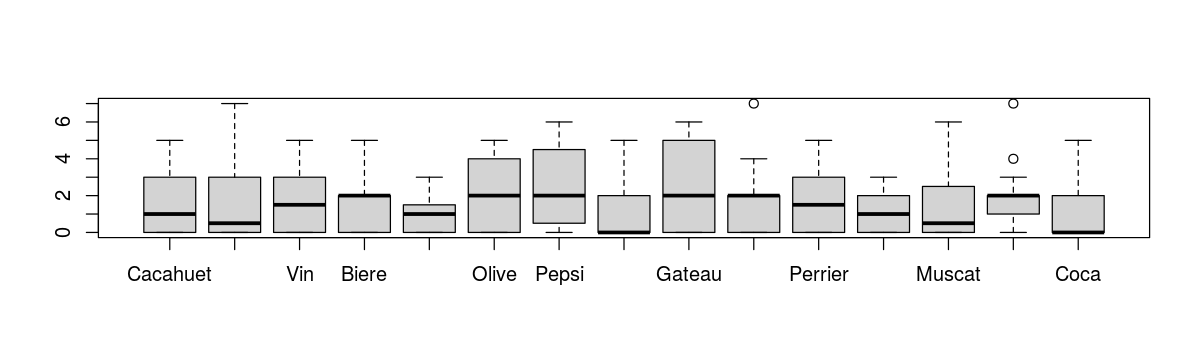

In [3]:
options(repr.plot.width = 10, repr.plot.height = 3)
boxplot(jouet)

Les données sont bien creuses mais les variables s'expriment dans des unités et donc avec des variances très différentes. Une forme de normalisation peut s'avérer  nécessaire. Elle concerne à la fois les produits (colonnes ou variables), car certains (chocolat) sont plébiscités plus que d'autres, ainsi que les clients qui peuvent avoir des échelles différentes de notation. C'est bien connu en *analyse sensorielle*.

### 2.2 Factorisation
Chargement de la librairie et identification des algorithmes disponibles. Plusieurs initialisation sont possibles; seule celle aléatoire par défaut est utilisée.

In [4]:
library(NMF)
# L'installation de Biobase peut poser problème. 
# Une solution possible est donnée ci-dessous : 
# if (!requireNamespace("BiocManager", quietly = TRUE))
# install.packages("BiocManager")
# BiocManager::install("Biobase")

nmfAlgorithm()

Loading required package: pkgmaker

Loading required package: registry

Loading required package: rngtools

Loading required package: cluster

NMF - BioConductor layer [OK] | Shared memory capabilities [NO: bigmemory] | Cores 7/8

  To enable shared memory capabilities, try: install.extras('
NMF
')



[1] "brunet"    "KL"        "lee"       "Frobenius" "offset"    "nsNMF"    
 [7] "ls-nmf"    "pe-nmf"    "siNMF"     "snmf/r"    "snmf/l"

In [5]:
nmfAlgorithm("brunet")

<object of class: NMFStrategyIterative>
 name: brunet [NMF]
 objective: 'KL' 
 model: NMFstd 
 <Iterative schema>
  onInit: none
  Update: function (i, v, x, copy = FALSE, eps = .Machine$double.eps, ...)
  Stop: 'connectivity'
  onReturn: none

In [6]:
nmfAlgorithm("lee")

<object of class: NMFStrategyIterative>
 name: lee [NMF]
 objective: 'euclidean' 
 model: NMFstd 
 <Iterative schema>
  onInit: none
  Update: function (i, v, x, rescale = TRUE, copy = FALSE, eps = 10^-9,
            weight = NULL, ...)
  Stop: 'connectivity'
  onReturn: none

In [7]:
nmfAlgorithm("snmf/l")

<object of class: NMFStrategyFunction>
 name: snmf/l [NMF]
 objective: function (x, y, eta = -1, beta = 0.01) 
 model: NMFstd 

In [8]:
nmfAlgorithm("snmf/r")

<object of class: NMFStrategyFunction>
 name: snmf/r [NMF]
 objective: function (x, y, eta = -1, beta = 0.01) 
 model: NMFstd 

**Q** Identifier la fonction perte.

Les deux derniers algorithmes sont issus de l'ALS. 


Comparer les méthodes en exécutant pour chacune d'entre elles 10 factorisations de rang 5. Les exécutions sont répétées car la convergence locale dépend de l'initialisation. 

In [9]:
res.multi.method <- nmf(jouet, 5, nrun = 10, list("brunet", "lee", "snmf/l", "snmf/r"), 
                        seed = 111, .options = "t")
compare(res.multi.method)

Compute NMF method 'brunet' [1/4] ... OK
Compute NMF method 'lee' [2/4] ... OK
Compute NMF method 'snmf/l' [3/4] ... OK
Compute NMF method 'snmf/r' [4/4] ... OK


,method,seed,rng,metric,rank,sparseness.basis,sparseness.coef,silhouette.coef,silhouette.basis,residuals,niter,cpu,cpu.all,nrun,cophenetic,dispersion,silhouette.consensus
,<chr>,<chr>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
brunet,brunet,random,1,KL,5,0.5252894,0.6324903,0.4151850,0.4477507,113.4927,510,0.059,12.465,10,0.8563142,0.6565333,0.4243513
lee,lee,random,4,euclidean,5,0.4862248,0.5715204,0.5822946,0.5338612,152.0974,560,0.087,13.144,10,0.9915385,0.7905778,0.7613535
snmf/l,snmf/l,random,3,<function>,5,0.5434909,0.4954688,0.4115941,0.5839088,193.7140,75,0.165,14.859,10,0.9596666,0.8446222,0.8385540
snmf/r,snmf/r,random,2,<function>,5,0.3426497,0.7559518,0.6485155,0.2716889,194.7508,70,0.248,14.240,10,1.0000000,0.9402667,0.9600000


The "ward" method has been renamed to "ward.D"; note new "ward.D2"

The "ward" method has been renamed to "ward.D"; note new "ward.D2"

The "ward" method has been renamed to "ward.D"; note new "ward.D2"

The "ward" method has been renamed to "ward.D"; note new "ward.D2"



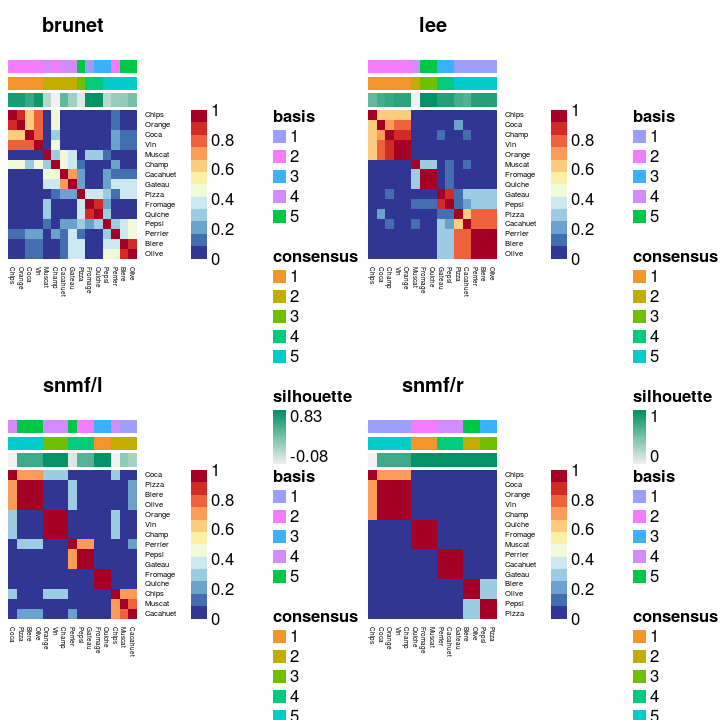

In [10]:
options(repr.plot.width = 6, repr.plot.height = 6)
consensusmap(res.multi.method, hclustfun = "ward") 

**Q** Plusieurs critères de comparaison sont proposés. Lequel choisir ? Pourquoi ?

**Q** Choix du rang des matrices de la décomposition. 

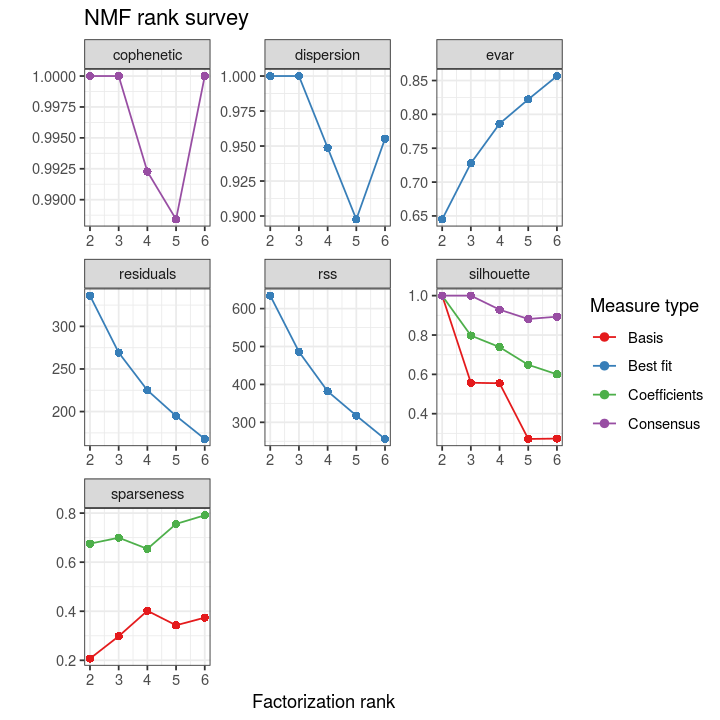

In [11]:
estim.r <- nmf(jouet, 2:6, method = "snmf/r", nrun = 10, seed = 100)
plot(estim.r)  

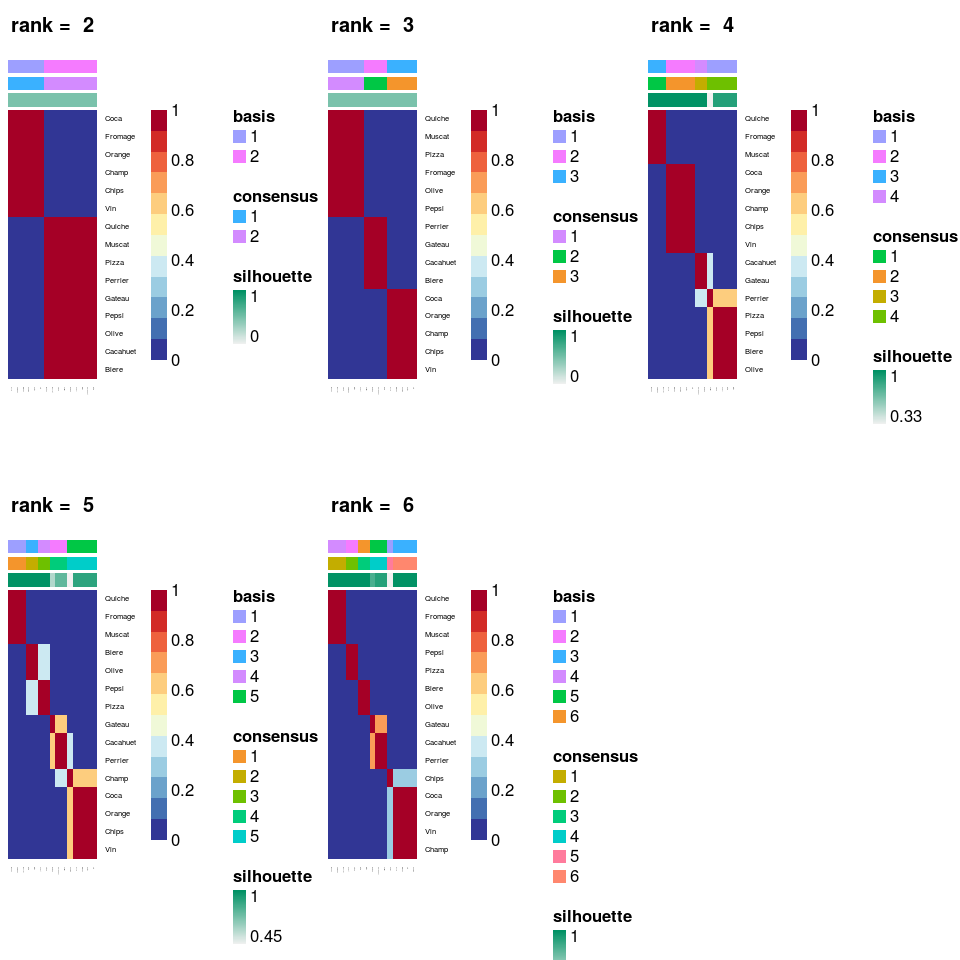

In [12]:
options(repr.plot.width = 8, repr.plot.height = 8)
consensusmap(estim.r) 

**Q** Utiliser les résultats précédents pour déterminer un rang optimal. 

Une fois méthode et rang déterminés, itérer plusieurs fois l'exécution pour retenir la meilleure. 

In [13]:
nmf.jouet <- nmf(jouet, 3, method = "snmf/r", nrun = 30, seed = 111)

Extraction des résultats numériques.

In [14]:
summary(nmf.jouet)

rank     sparseness.basis      sparseness.coef 
           3.0000000            0.2980561            0.6997009 
     silhouette.coef     silhouette.basis            residuals 
           0.7972365            0.5573493          269.2234419 
               niter                  cpu              cpu.all 
          60.0000000            0.1760000           25.8330000 
                nrun           cophenetic           dispersion 
          30.0000000            1.0000000            1.0000000 
silhouette.consensus 
           1.0000000

In [15]:
# les matrices de facteurs
w <- basis(nmf.jouet)
h <- coef(nmf.jouet)

### Représentation des classifications
Production de classifications non-supervisées et graphiques associés aux matrices `w` et `h` de la factorisation.  Ceci permet d'identifier des groupes de clients au regard de leur consommation ou préférences comme de construire des classes de produits appréciés simultanément.

The "ward" method has been renamed to "ward.D"; note new "ward.D2"

The "ward" method has been renamed to "ward.D"; note new "ward.D2"



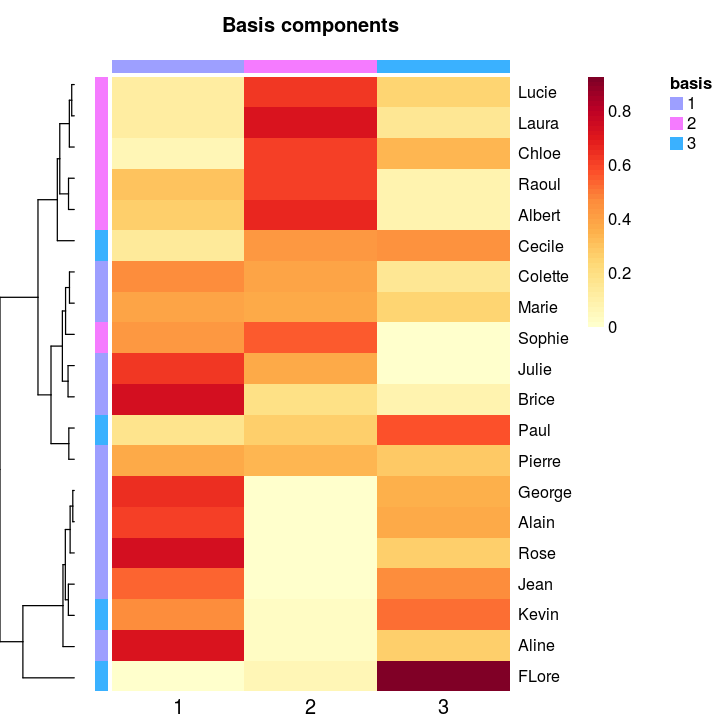

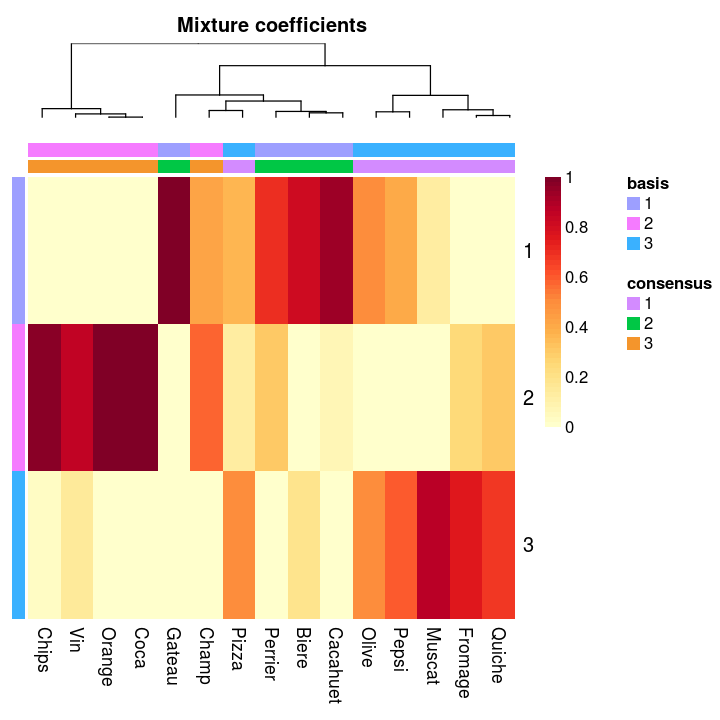

In [16]:
options(repr.plot.width = 6, repr.plot.height = 6)
basismap(nmf.jouet, hclustfun = "ward")
coefmap(nmf.jouet,hclustfun = "ward")

Comme c'est logique, le dendrogramme produit dans les cartes précédentes est directement issu des classifications ascendantes hiérarchiques calculées à partir des distances euclidiennes entre les lignes de `w` d'une part et les colonnes de `h` d'autre part.

**Vérification**

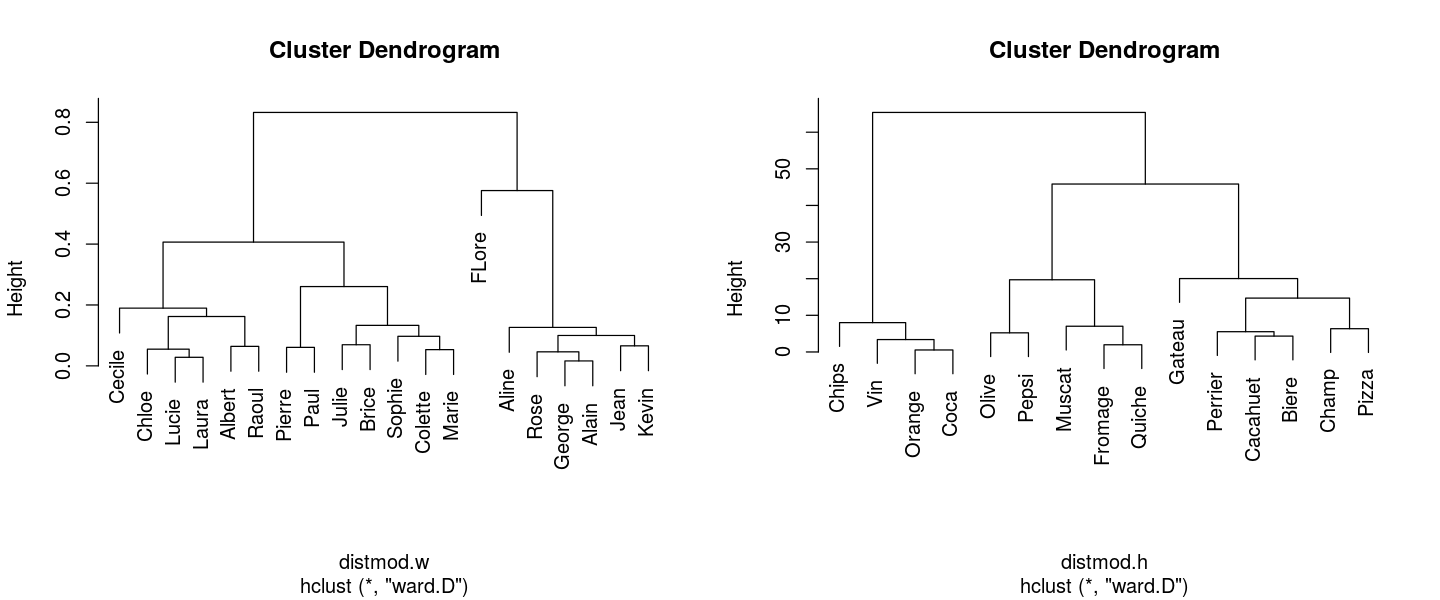

In [17]:
library(class)
distmod.w <- dist(w, method = "euclidean")
hclusmod.w <- hclust(distmod.w, method = "ward.D")
hclasmod.w <- cutree(hclusmod.w, k = 3)
distmod.h <- dist(t(h), method = "euclidean")
hclusmod.h <- hclust(distmod.h, method = "ward.D")
hclasmod.h <- cutree(hclusmod.h, k = 3)

options(repr.plot.width = 12, repr.plot.height = 5)
par(mfrow = c(1, 2))
plot(hclusmod.w)
plot(hclusmod.h)

La classification des objets est représentable dans les coordonnées d'un MDS ou dans les composantes d'une ACP des facteurs de la NMF ; c'est équivalent en considérant la distance euclidienne définie à partir de ces facteurs.

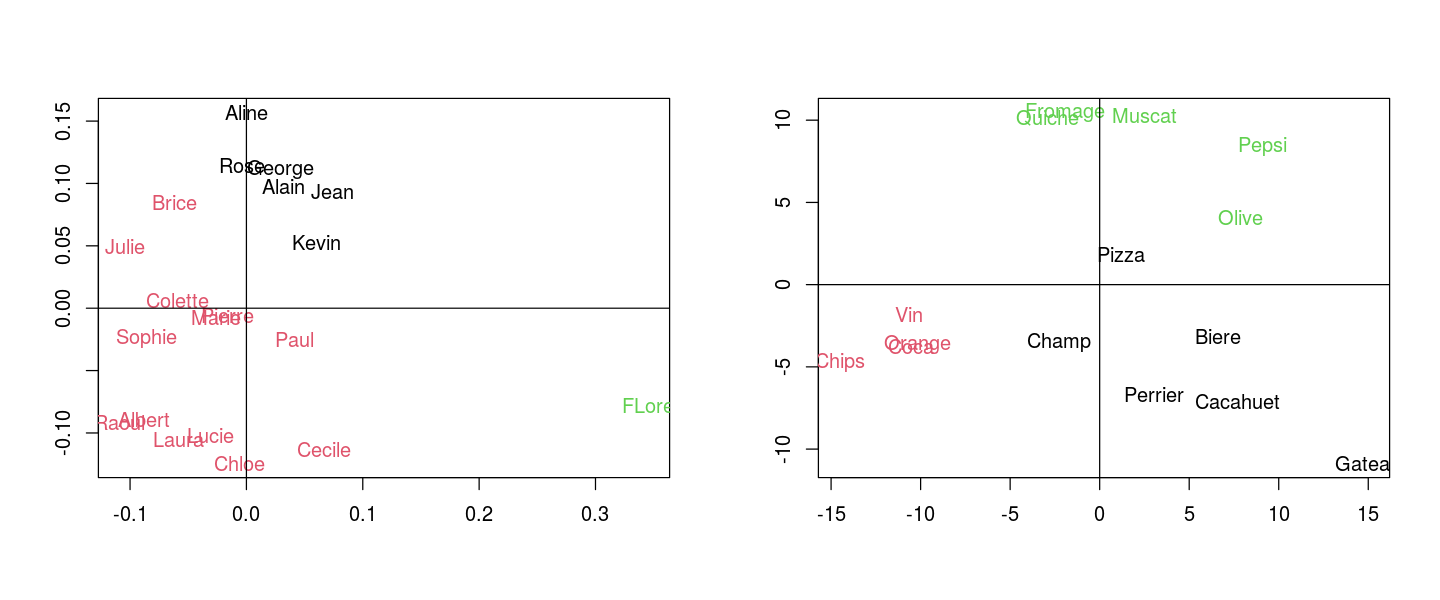

In [18]:
mdjouet.w <- cmdscale(distmod.w, k = 2)
dN.w <- dimnames(w)[[1]]

mdjouet.h <- cmdscale(distmod.h, k = 2)
dN.h <- dimnames(h)[[2]]

options(repr.plot.width = 12, repr.plot.height = 5)
par(mfrow = c(1, 2))
plot(mdjouet.w, type = "n", xlab = "", ylab = "", main = "")
text(mdjouet.w, dN.w, col = hclasmod.w)
abline(v = 0, h = 0)
plot(mdjouet.h, type = "n", xlab = "", ylab = "", main = "")
text(mdjouet.h, dN.h, col = hclasmod.h)
abline(v = 0, h = 0)

**Q** Les produits à plus forte occurrence ou note peuvent prendre trop d'importance. Quelle opération simple peut-on effectuer les lignes de `w` et les colonnes de `h` pour en tenir compte ? Reprendre l'analyse précédente avec cette modification. 

Il n'est pas possible comme en ACP ou AFCM de mettre en relation les deux représentations des lignes et colonnes, individus et variables de la matrice factorisée. Cela peut être fait de façon détournée à l'aide d'une *heatmap* qui  intègre les classifications obtenues en réordonnant les lignes et colonnes de $X$. 

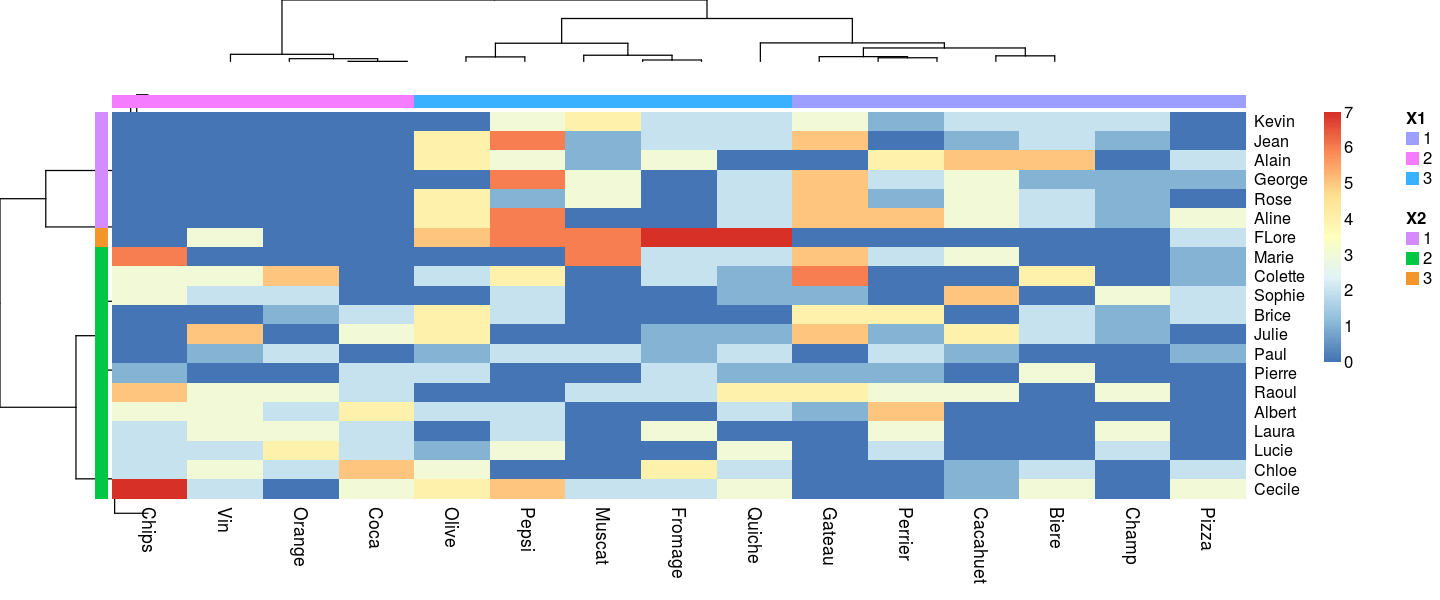

In [19]:
# intégration des deux classifications
aheatmap(jouet, Rowv = hclusmod.w, Colv = hclusmod.h, 
         annRow = as.factor(hclasmod.w), annCol = as.factor(hclasmod.h))

*Remarque*. Les données ont été générées de façon assez aléatoire. Ne pas chercher à interpréter ou une cohérence dans les groupes.

## 3 Recommandation pour l'apéro
### 3.1 recommandation par NMF
L'objectif de rechercher les produits les plus susceptibles d'intéresser les clients. Celui-ci est atteint en reconstruisant une approximation de la matrice `x` par produit des matrices des facteurs. 

*Les couples (client, produit) pour lesquels les valeurs reconstruites sont le plus élevées alors qu'il n'y a pas eu d'achat ou de notation, sont ceux qui sont ciblés afin de proposer le produit identifié au client de ce couple.*

**Attention**, le choix du rang est déterminant. En utilisant le choix optimal précédent ($r=4$) la reconstruction est finalement "trop" bonne et aucune recommandation n'émerge de la reconstruction de `x`. Le choix $r=2$, sous-optimal, fait ressortir des couples candidats pour la recommandation.

In [20]:
# Exécution avec r=2
nmf.jouet <- nmf(jouet, 2, method = "snmf/r", nrun = 30, seed = 111)
# Matrice reconstruite
xchap <- w %*% h

Il s'agit ensuite de comparer la reconstruction avec les donées initiales afin d'identifier le plus fort score reconstruit par client.

**Q** Justifier le calcul de `prod` ci-dessous, en distinguant selon le cas `jouet = 0` ou `jouet > 0`.

In [21]:
prod <- apply(xchap - 10 * jouet, 1, function(x) which.max(x))
# Identifier le produit correspondant
cbind(dN.w, dN.h[prod])

dN.w,
Jean,Perrier
Julie,Chips
Brice,Cacahuet
George,Olive
Rose,Pizza
Colette,Perrier
Aline,Muscat
Marie,Pepsi
Albert,Champ
Kevin,Olive


**Remarques**

-  La démarche s'applique également à de simples matrices de (0, 1) de présence / absence d'achat.
-  Les matrices peuvent être très grandes (données massives) sur des sites marchand, il est alors nécessaire d'utiliser des librairies avec représentation adaptée de matrices creuses pour réduire l'occupation mémoire. Seules les valeurs non nulles sont stockées.
-  L'initialisation, ou *cold start*, de la matrice est un problème bien identifié. Cela concerne l'introduction d'un nouveau client ou d'un nouveau produit dans la base.
-  D'autres approches concurrentes sont proposées ci-après.


### 3.2 Recommandation par SVD
La décomposition en valeurs singulières propose également une factorisation de la matrice $X=U\Lambda V'$. Celle-ci a de bien meilleure propriétés numériques dont l'unicité de la solution optimale qui est atteinte pour un rang fixé. Des contraintes de parcimonie ou de régularité peuvent également être associées à la fonction perte quadratique (*sparse SVD*). 

#### ACP
La démarche est équivalente et découle directement de la SVD donc de l'[analyse en composantes principales](http://wikistat.fr/pdf/st-m-explo-acp.pdf) de $X$. Remarquer une forte similitude entre les représentions obtenus par MDS des facteurs de le NMF et celles de l'ACP:

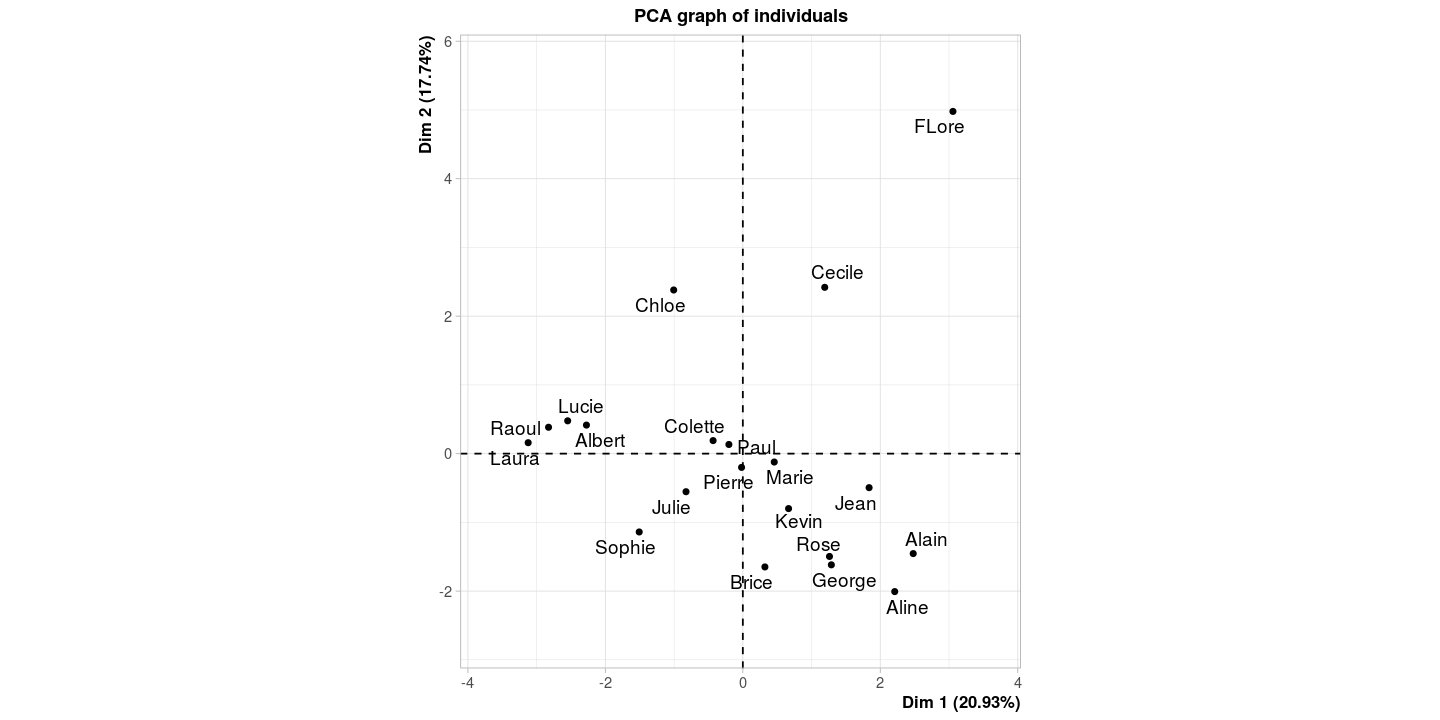

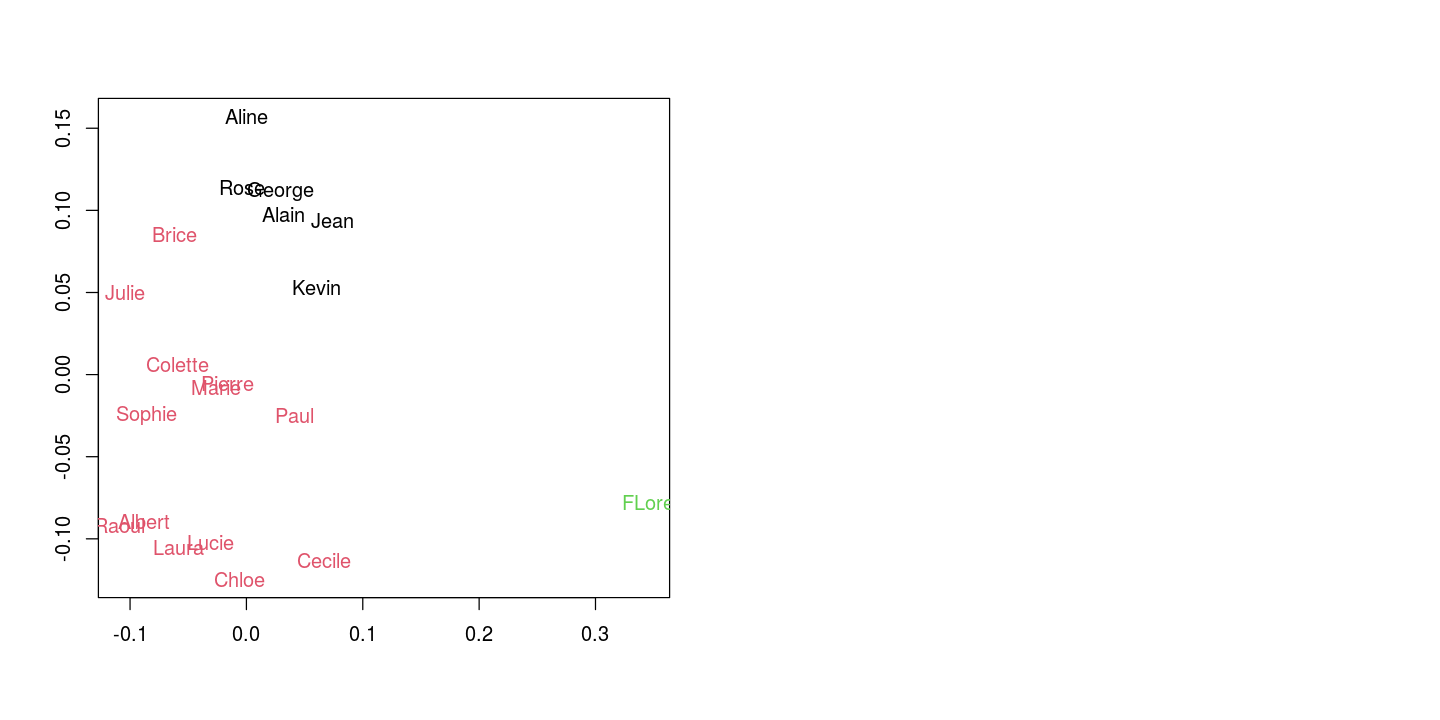

In [22]:
library(FactoMineR)
acp <- PCA(jouet, graph = FALSE)

options(repr.plot.width = 12, repr.plot.height = 6)
par(mfrow = c(1, 2))
plot(acp)
plot(mdjouet.w, type = "n", xlab = "", ylab = "", main = "")
text(mdjouet.w, dN.w, col = hclasmod.w)

**Q** Adapt the previous code for the variables.

#### Recommandation
Approximation de rang 2 par SVD puis comparaison avec les valeurs initiales afin d'identifier le plus fort score reconstruit.

In [23]:
res <- svd(jouet)
# Matrice reconstruite
xchap <- res$u[,1:2] %*% diag(res$d[1:2]) %*% t(res$v[,1:2])
dN.h <- dimnames(jouet)[[2]]
dN.w <- dimnames(jouet)[[1]]

In [24]:
prod <- apply(xchap - 10 * jouet, 1, function(x) which.max(x))
# Identifier le produit correspondant à promouvoir
cbind(dN.w, dN.h[prod])

dN.w,
Jean,Perrier
Julie,Pepsi
Brice,Cacahuet
George,Olive
Rose,Pizza
Colette,Perrier
Aline,Muscat
Marie,Pepsi
Albert,Fromage
Kevin,Olive


Qui conduit donc, sur cet exemple trivial, à des résultats identiques. 

### 3.3 Par complétion de matrice
Lorsque, les données sont des notes d'appréciation, la valeur "0" signifie en principe une valeur manquante et le problème est formellement celui d'une complétion de matrice. La librairie `softImpute` de R en propose une solution par un algorithme de SVD seuillée (Hastie et Mazumder et al. 2010). Il s'agit donc d'approcher une matrice très creuse avec beaucoup de valeurs manquantes par une matrice de faible rang. L'algorithme est analogue à un algorithme EM pour imputation de données manquantes. La fonction R accepte la classe de représentation des grandes matrices creuses.

Les valeurs nulles sont remplacées par des valeurs manquantes.

In [25]:
jouet.na <- jouet
jouet.na[jouet==0] <- NA

La recommandation se fait comme avec la SVD. Une étude plus approfondie de cet algorithme et de son usage s'avère nécessaire, notamment pour régler rang et paramètre de pénalisation.

In [26]:
library(softImpute)
res <- softImpute(jouet.na, rank.max = 2, type = "svd", lambda = 1)
# Matrice reconstruite
xchap <- res$u %*% diag(res$d) %*% t(res$v)

Loading required package: Matrix

Loaded softImpute 1.4




Comparer avec les données initiales pour identifier le plus fort score reconstruit par client.

In [27]:
prod <- apply(xchap - 10 * jouet, 1, function(x) which.max(x))
# Identifier le produit correspondant
cbind(dN.w, dN.h[prod])

dN.w,
Jean,Chips
Julie,Chips
Brice,Chips
George,Chips
Rose,Chips
Colette,Muscat
Aline,Chips
Marie,Pepsi
Albert,Fromage
Kevin,Chips


Cette étude n'est qu'une brève introduction au problème du filtrage collaboratif. De nombreuses questions n'ont pas été abordées dont le *cold start* et surtout celle très importante de l'**évaluation** de tels systèmes. 

Un procédé simple consiste à volontairement supprimer des valeurs, c'est à dire des achats réels, afin de déterminer quelle stratégie retrouve au mieux ces propositions; c'était le principe du concours Netflix.